In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
from catboost import CatBoostClassifier
cb = CatBoostClassifier(iterations=100)
#cb.fit(X, y, cat_features = cat_features, verbose = False)

In [3]:
data = pd.read_csv('../../../Data/Combo_3_DropNAs.csv')
data.shape

(11091453, 4)

In [4]:
data.head(5)

,Risk_Score,DI,Employment Length,Accepted
0,0.411783,-0.008441,2.668416,1
1,0.871415,-0.007807,2.668416,1
2,0.641599,-0.008137,2.668416,1
3,1.675772,-0.007744,2.668416,1
4,0.641599,-0.007225,0.458258,1


In [5]:
data.Accepted.value_counts()*0.3

0    2693342.7
1     634093.2
Name: Accepted, dtype: float64

In [6]:
X = data.drop('Accepted', axis=1)
X.shape

(11091453, 3)

In [7]:
y = data['Accepted']

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)

In [9]:
cb.fit(X_train, y_train, verbose=10)

Learning rate set to 0.5
0:	learn: 0.3839282	total: 377ms	remaining: 37.3s
1:	learn: 0.2709623	total: 552ms	remaining: 27s
2:	learn: 0.2157017	total: 736ms	remaining: 23.8s
3:	learn: 0.1835134	total: 930ms	remaining: 22.3s
4:	learn: 0.1615016	total: 1.13s	remaining: 21.5s
5:	learn: 0.1509937	total: 1.32s	remaining: 20.7s
6:	learn: 0.1382995	total: 1.52s	remaining: 20.2s
7:	learn: 0.1325873	total: 1.72s	remaining: 19.7s
8:	learn: 0.1236206	total: 1.91s	remaining: 19.3s
9:	learn: 0.1204957	total: 2.1s	remaining: 18.9s
10:	learn: 0.1161856	total: 2.28s	remaining: 18.4s
11:	learn: 0.1102222	total: 2.45s	remaining: 18s
12:	learn: 0.1072872	total: 2.62s	remaining: 17.5s
13:	learn: 0.1056255	total: 2.81s	remaining: 17.3s
14:	learn: 0.0997726	total: 3s	remaining: 17s
15:	learn: 0.0950631	total: 3.17s	remaining: 16.6s
16:	learn: 0.0936294	total: 3.35s	remaining: 16.3s
17:	learn: 0.0919096	total: 3.55s	remaining: 16.2s
18:	learn: 0.0906892	total: 3.75s	remaining: 16s
19:	learn: 0.0885770	total: 

In [10]:
cb.score(X_test, y_test)

0.973409255655105

In [11]:
from sklearn.metrics import confusion_matrix
y_pred = cb.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [12]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[2655258,   38085],
       [  50394,  583699]])

In [13]:
confusion_matrix_full = pd.DataFrame(cm,
                                     index=["Actual_Rejected","Actual_Accepted"],
                                     columns=["Predicted_Rejected","Predicted_Accepted"])

confusion_matrix_full

,Predicted_Rejected,Predicted_Accepted
Actual_Rejected,2655258,38085
Actual_Accepted,50394,583699


In [14]:
X.columns

Index(['Risk_Score', 'DI', 'Employment Length'], dtype='object')

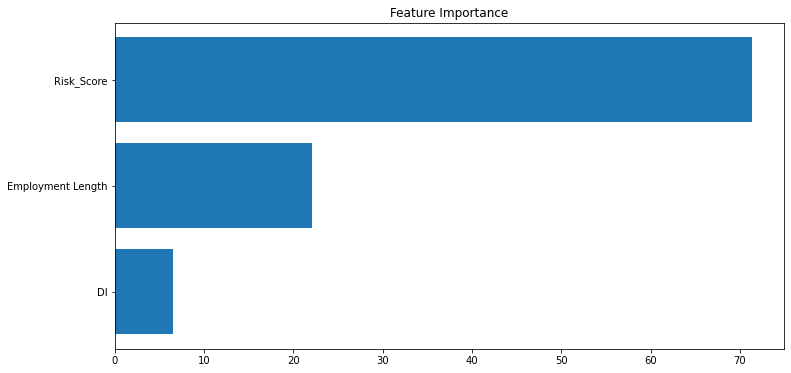

In [16]:
import matplotlib.pyplot as plt

feature_importance = cb.feature_importances_
sorted_idx = np.argsort(feature_importance)
fig = plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X_test.columns)[sorted_idx])
plt.title('Feature Importance');

In [17]:
import shap

Text(0.5, 1.0, 'SHAP Importance')

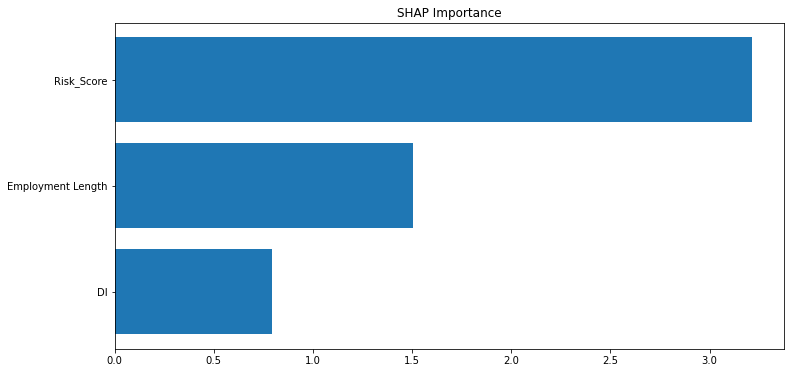

In [18]:
explainer = shap.Explainer(cb)
shap_values = explainer(X_test)
shap_importance = shap_values.abs.mean(0).values
sorted_idx = shap_importance.argsort()
fig = plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_idx)), shap_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X_test.columns)[sorted_idx])
plt.title('SHAP Importance')

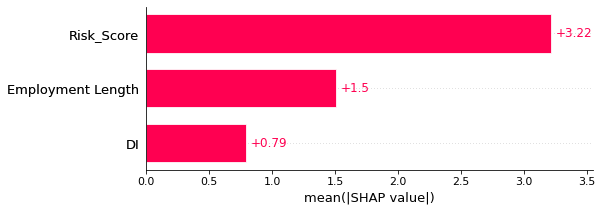

In [19]:
shap.plots.bar(shap_values, max_display=X_test.shape[0])

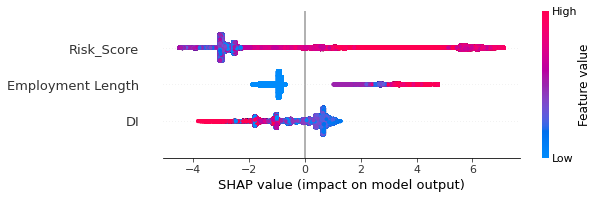

In [20]:
shap.summary_plot(shap_values, max_display=X_test.shape[0])